In [7]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

In [39]:
def bounded_confidence_dynamics(G, mu, epsilon, stop_threshold):

    max_change = np.inf
    while max_change > stop_threshold:

        # saves the old opinions
        old_opinions = {i: G.nodes[i]['opinion'] for i in G.nodes}

        # updates opinions according to bounded confidence rule
        for node1 in G.nodes():
            if G.neighbors(node1):
                node2 = np.random.choice(list(G.neighbors(node1)))
                if abs(G.nodes[node1]['opinion'] - G.nodes[node2]['opinion']) <= epsilon:
                    diff = G.nodes[node2]['opinion'] - G.nodes[node1]['opinion']
                    G.nodes[node1]['opinion'] += mu * diff
                    G.nodes[node2]['opinion'] -= mu * diff

        # computes the maximum change in opinions
        max_change = max(abs(G.nodes[i]['opinion'] - old_opinions[i]) / old_opinions[i] for i in G.nodes)

    return G

In [42]:
def run_model(N, mu, epsilon, stop_threshold = 0.01, ax = None):

    # generates graph with random initial opinions
    G = nx.complete_graph(N)
    for i in G.nodes:
        G.nodes[i]['opinion'] = np.random.rand()
    
    # runs the model
    G = bounded_confidence_dynamics(G, mu, epsilon, stop_threshold)
    
    # plots the histogram of opinions
    opinions = [G.nodes[i]['opinion'] for i in G.nodes()]
    if ax is None:
        _, ax = plt.subplots()
    ax.hist(opinions, bins=np.linspace(0,1,20))
    ax.set_ylim(0, N)
    ax.set_title("mu = {}, epsilon = {}".format(mu, epsilon))

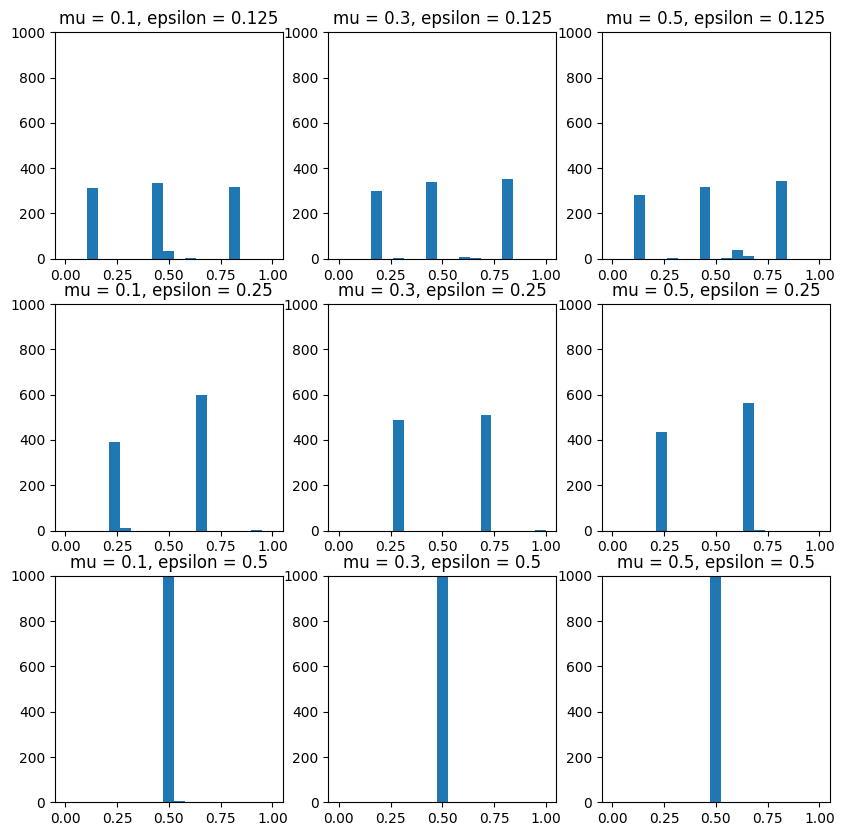

In [43]:
mu = [0.1, 0.3, 0.5]
epsilon = [0.125, 0.25, 0.5]
fig, axes = plt.subplots(3, 3, figsize=(10,10))
for i in range(3):
    for j in range(3):
        run_model(1000, mu[i], epsilon[j], ax = axes[j][i])